In [1]:
import MySQLdb as mysql
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
db = mysql.connect(host='128.61.35.111', user='emade', passwd='emade', db='emade_titanic')
c = db.cursor()

In [70]:
for i in range(0, 16):
    c.execute("SELECT `FullDataSet False Positives`, `FullDataSet False Negatives`, `FullDataSet Num Elements` FROM individuals where hash in (select hash from paretofront where generation="+str(i)+" order by id ASC)")
    individuals = c.fetchall()

    false_positives = sorted([ind[0] for ind in individuals if ind[0] is not None], reverse=True)
    false_negatives = sorted([ind[1] for ind in individuals if ind[1] is not None], reverse=False)
    num_elements = [ind[2] for ind in individuals if ind[0] is not None]

    '''Print dominated population for debugging'''
    # for ind in pop:
    #     print(ind.fitness)

    plt.scatter(false_positives, false_negatives, color='r')
    plt.plot(false_positives, false_negatives, color='r', drawstyle='steps-post')
    plt.xlabel("False Positives")
    plt.ylabel("False Negatives")
    plt.title("Pareto Front")
    plt.show()

    f1 = np.array(false_positives)
    f2 = np.array(false_negatives)

    """Calculate area under curve with least squares method"""
    print("Area Under Curve: %s" % (np.sum(np.abs(np.diff(f1))*f2[:-1])))

NameError: name 'c' is not defined

In [76]:
individuals = []
with open("pareto_combined.csv") as pareto_file:
    reader = csv.reader(pareto_file)
    next(reader, None) #skip the header
    curr = []
    last = 0
    for row in reader:
        index = int(float(row[1]))
        if index == last:
            curr.append((row[2], row[3]))
        else:
            last = index
            individuals.append(curr)
            curr = [(row[2], row[3])]

In [86]:
'''
Method to take two equally-sized lists and return just the elements which lie 
on the Pareto frontier, sorted into order.
Default behaviour is to find the maximum for both X and Y, but the option is
available to specify maxX = False or maxY = False to find the minimum for either
or both of the parameters.
'''
def pareto_frontier(Xs, Ys, maxX = False, maxY = False):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
# Loop through the sorted list
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
# Turn resulting pairs back into a list of Xs and Ys
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

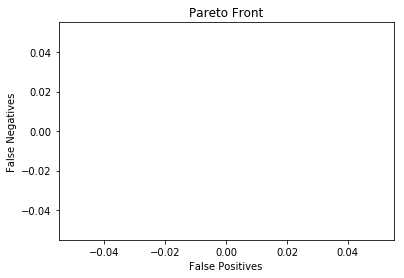

Area Under Curve: 0.0


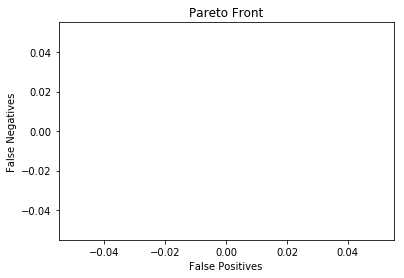

Area Under Curve: 0.0


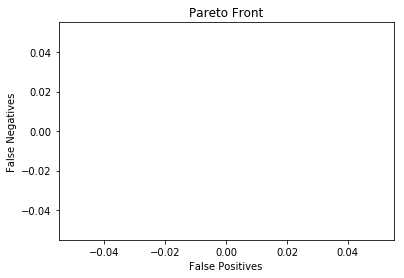

Area Under Curve: 0.0


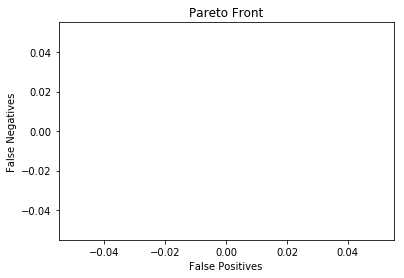

Area Under Curve: 0.0


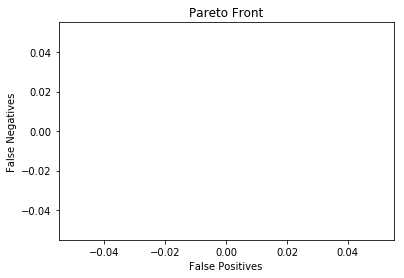

Area Under Curve: 0.0


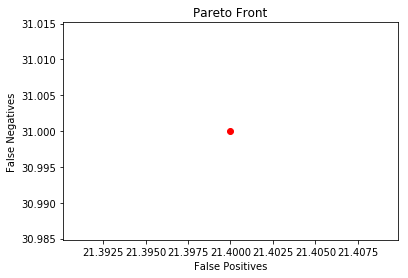

Area Under Curve: 0.0


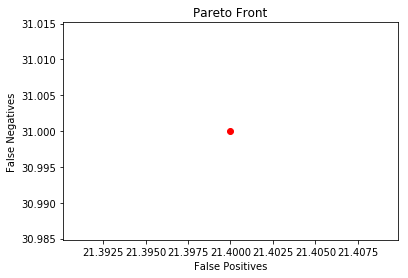

Area Under Curve: 0.0


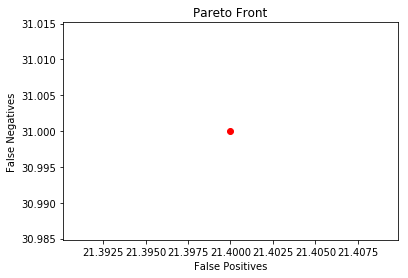

Area Under Curve: 0.0


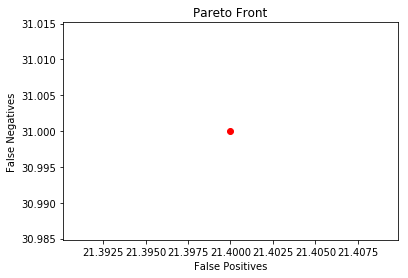

Area Under Curve: 0.0


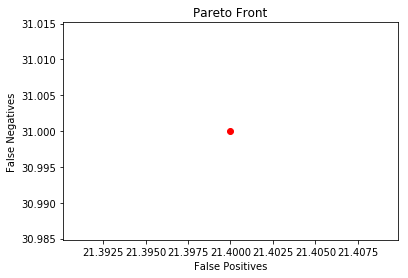

Area Under Curve: 0.0


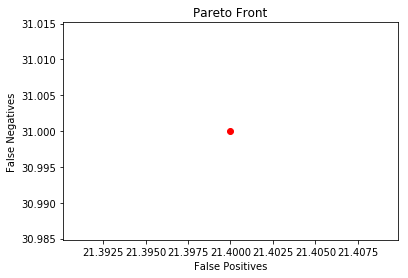

Area Under Curve: 0.0


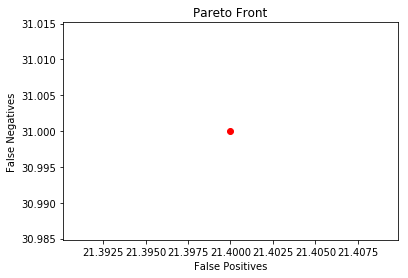

Area Under Curve: 0.0


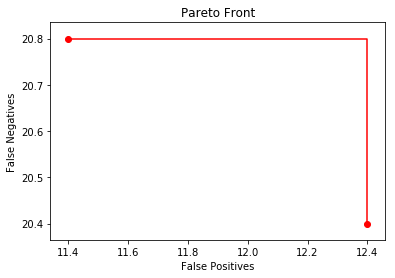

Area Under Curve: 20.8


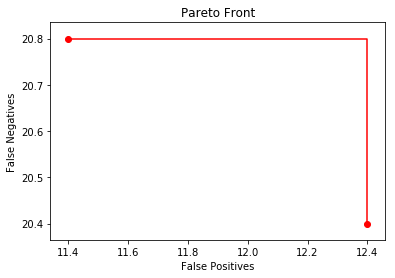

Area Under Curve: 20.8


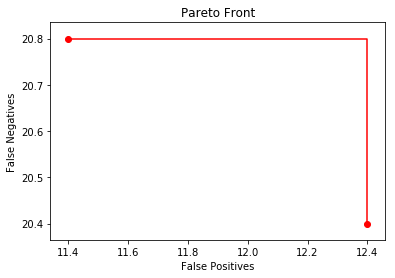

Area Under Curve: 20.8


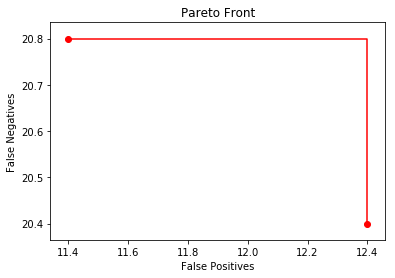

Area Under Curve: 20.8


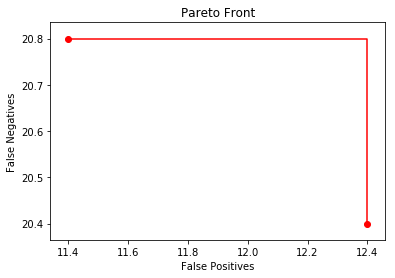

Area Under Curve: 20.8


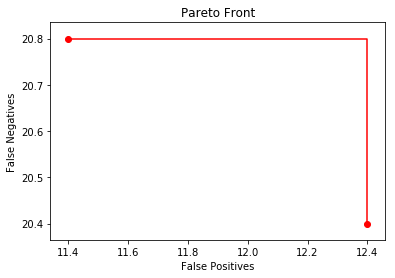

Area Under Curve: 20.8


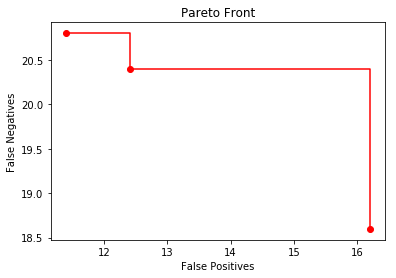

Area Under Curve: 98.31999999999996


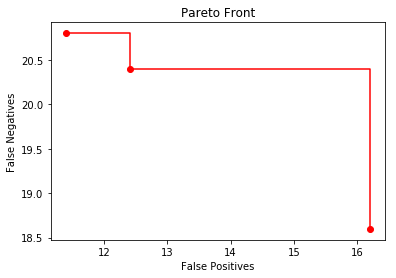

Area Under Curve: 98.31999999999996


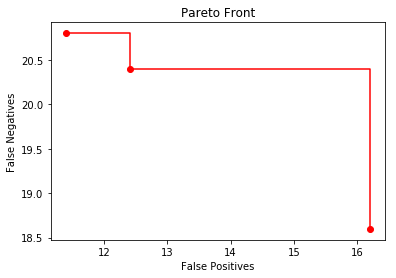

Area Under Curve: 98.31999999999996


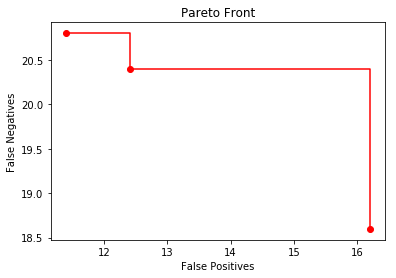

Area Under Curve: 98.31999999999996


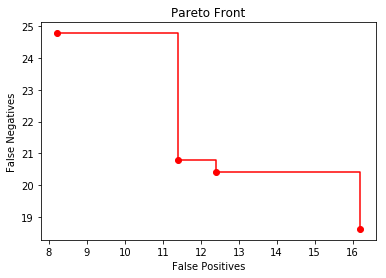

Area Under Curve: 177.68000000000004


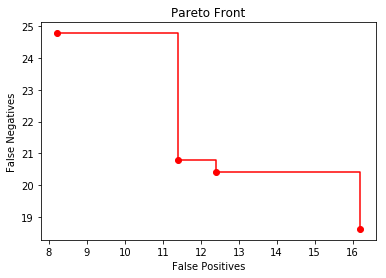

Area Under Curve: 177.68000000000004


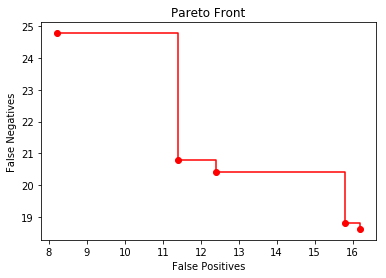

Area Under Curve: 177.04000000000005


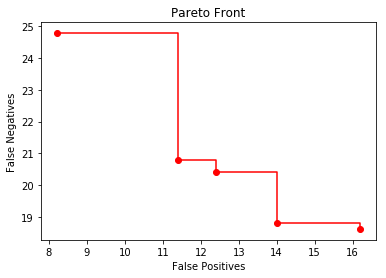

Area Under Curve: 174.16000000000005


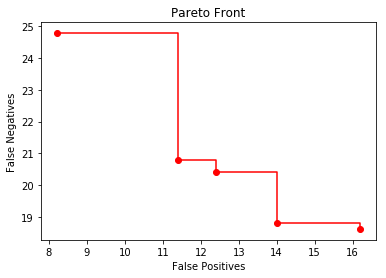

Area Under Curve: 174.16000000000005


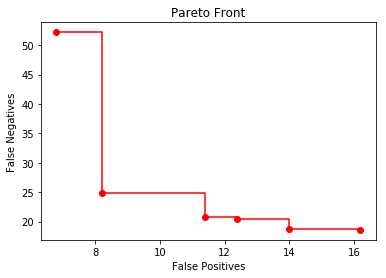

Area Under Curve: 247.23999999999992


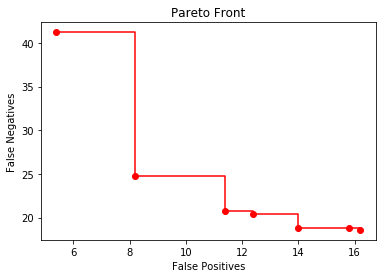

Area Under Curve: 289.52


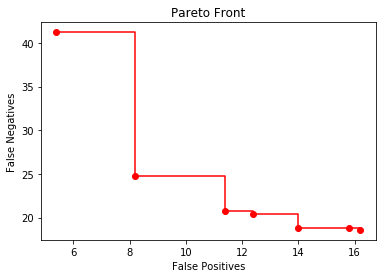

Area Under Curve: 289.52


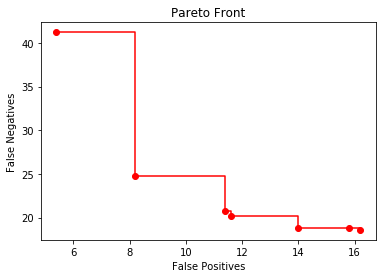

Area Under Curve: 288.71999999999997


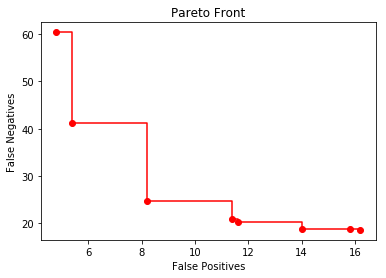

Area Under Curve: 324.96


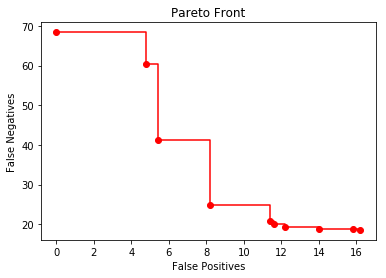

Area Under Curve: 651.84


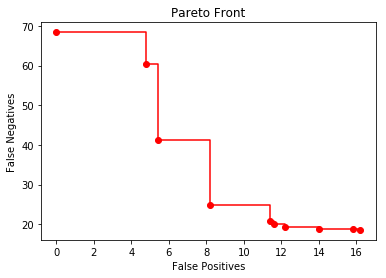

Area Under Curve: 651.84


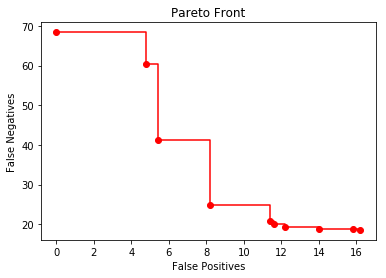

Area Under Curve: 651.84


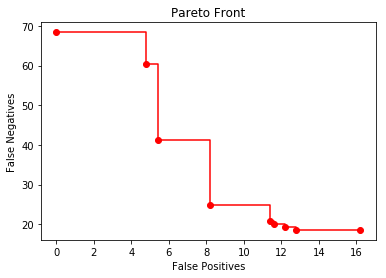

Area Under Curve: 650.44


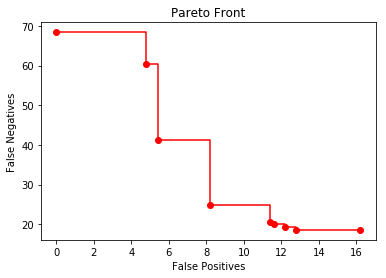

Area Under Curve: 650.4000000000001


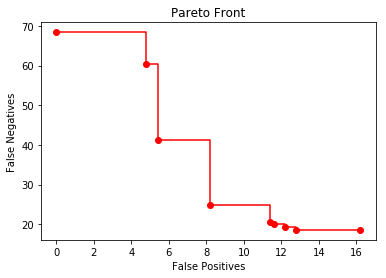

Area Under Curve: 650.4000000000001


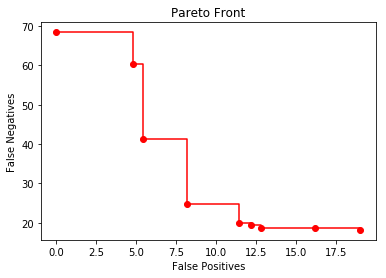

Area Under Curve: 702.2400000000001


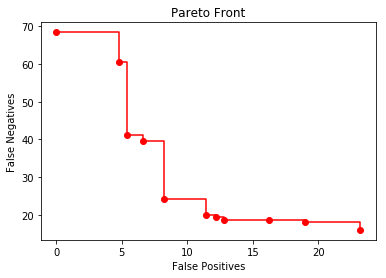

Area Under Curve: 774.2


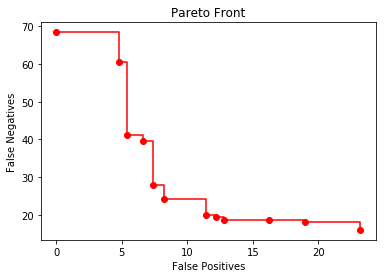

Area Under Curve: 764.7600000000001


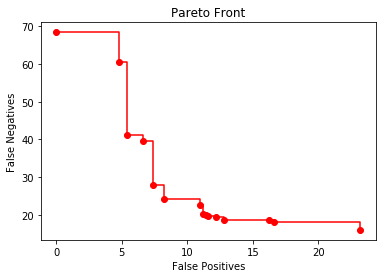

Area Under Curve: 762.4400000000002


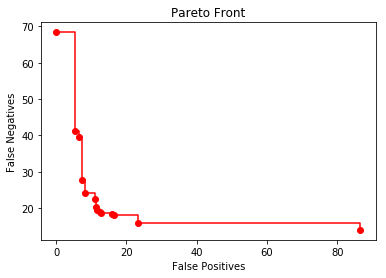

Area Under Curve: 1781.96


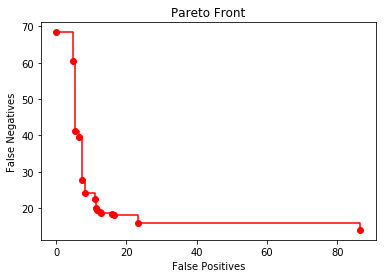

Area Under Curve: 1777.08


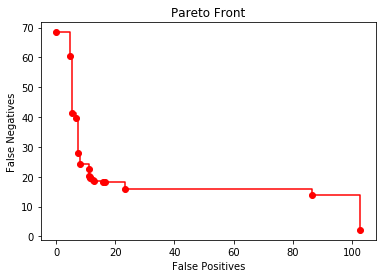

Area Under Curve: 2003.3999999999996


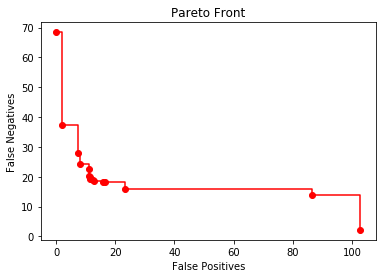

Area Under Curve: 1895.24


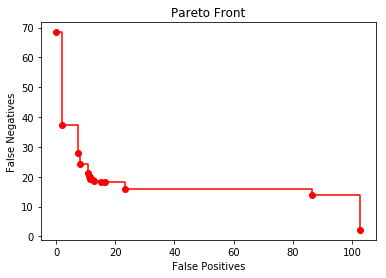

Area Under Curve: 1894.0


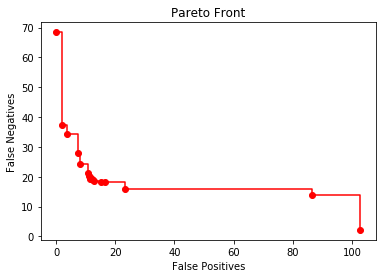

Area Under Curve: 1882.52


In [87]:
aucs = []
for generation in individuals:
    false_positives = [float(ind[0]) for ind in generation if ind[0] is not 'inf']
    false_negatives = [float(ind[1]) for ind in generation if ind[1] is not 'inf']
    
    filtered_fp, filtered_fn = pareto_frontier(false_positives, false_negatives)

    '''Print dominated population for debugging'''
    # for ind in pop:
    #     print(ind.fitness)

    plt.scatter(filtered_fp, filtered_fn, color='r')
    plt.plot(filtered_fp, filtered_fn, color='r', drawstyle='steps-post')
    plt.xlabel("False Positives")
    plt.ylabel("False Negatives")
    plt.title("Pareto Front")
    plt.show()

    f1 = np.array(filtered_fp)
    f2 = np.array(filtered_fn)

    """Calculate area under curve with least squares method"""
    auc = np.sum(np.abs(np.diff(f1))*f2[:-1])
    aucs.append(auc)
    print("Area Under Curve: %s" % (auc))

plt.scatter(np.arange(len(aucs)), aucs)
plt.plot(np.arange(len(aucs)), aucs)
plt.show()